In [2]:
import pandas as pd
import spacy
nlp = spacy.load("nl_core_news_sm")
from tqdm.notebook import tqdm
from wordfreq import word_frequency, top_n_list

In [39]:
df = pd.read_csv('../output/corpus.csv')
#df = pd.read_csv('../output/NOS_corpus.csv')
df.set_index('word', inplace=True)

In [40]:
print(len(df.columns))

60


In [55]:
def process_text(text, remove_stopwords=True):
    return [token.lemma_ for token in nlp(text) if not ((remove_stopwords and token.is_stop) or token.is_punct or token.is_space)]

nr_of_words = [1200]
freqworddict = {str(k): [] for k in nr_of_words}

for number in tqdm(freqworddict.keys(), total=len(freqworddict)):
    freqworddict[number] = process_text(' '.join(top_n_list('nl', int(number))), remove_stopwords=True)
    # print(len(freqworddict[number]))

conferenceworddict = {k: {} for k in df.columns}
#print(conferenceworddict)
for column in tqdm(df.columns, total=len(df.columns)):
        conference_words = df.loc[:, column]
        conferenceworddict[column]['totalwords'] = conference_words.sum()
        for number in freqworddict:   
            conferenceworddict[column][f'top{number}basicwords'] = 0 

            for word, count in conference_words.iteritems():
                    if word in freqworddict[number]:
                        conferenceworddict[column][f'top{number}basicwords'] += count

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

In [56]:
list(conferenceworddict.keys())
conferenceworddict['2020-03-06']

{'totalwords': 1665.0, 'top1200basicwords': 942.0}

In [57]:
l3 = conferenceworddict[list(conferenceworddict.keys())[0]].keys()
l3 = [x for x in l3 if 'basicwords' in x]
l3

['top1200basicwords']

In [58]:
from pprint import pprint
l = [l3]
# Zonder Stopwoorden
for conference in conferenceworddict:
    l2 = []
    for key in l3:
        conferenceworddict[conference][f'percentage_{key}'] = float(format(round(conferenceworddict[conference][key] / conferenceworddict[conference]['totalwords'], 2), '.2f'))
        l2.append(conferenceworddict[conference][f'percentage_{key}'])
    l.append(l2)
#pprint(conferenceworddict)
pprint(l)

[['top1200basicwords'],
 [0.57],
 [0.57],
 [0.56],
 [0.56],
 [0.56],
 [0.61],
 [0.56],
 [0.58],
 [0.59],
 [0.58],
 [0.62],
 [0.61],
 [0.57],
 [0.59],
 [0.57],
 [0.57],
 [0.58],
 [0.56],
 [0.6],
 [0.6],
 [0.56],
 [0.6],
 [0.58],
 [0.63],
 [0.53],
 [0.6],
 [0.59],
 [0.55],
 [0.57],
 [0.55],
 [0.58],
 [0.55],
 [0.58],
 [0.58],
 [0.55],
 [0.55],
 [0.61],
 [0.58],
 [0.57],
 [0.56],
 [0.54],
 [0.56],
 [0.56],
 [0.57],
 [0.56],
 [0.56],
 [0.56],
 [0.58],
 [0.58],
 [0.56],
 [0.56],
 [0.58],
 [0.57],
 [0.58],
 [0.57],
 [0.57],
 [0.58],
 [0.54],
 [0.56],
 [0.57]]


In [23]:
df3['basicwords1200'][0]

0.46

Text(30, 0.46, 'percentage of top 1200 basic words in nos.nl articles')

<Figure size 432x288 with 0 Axes>

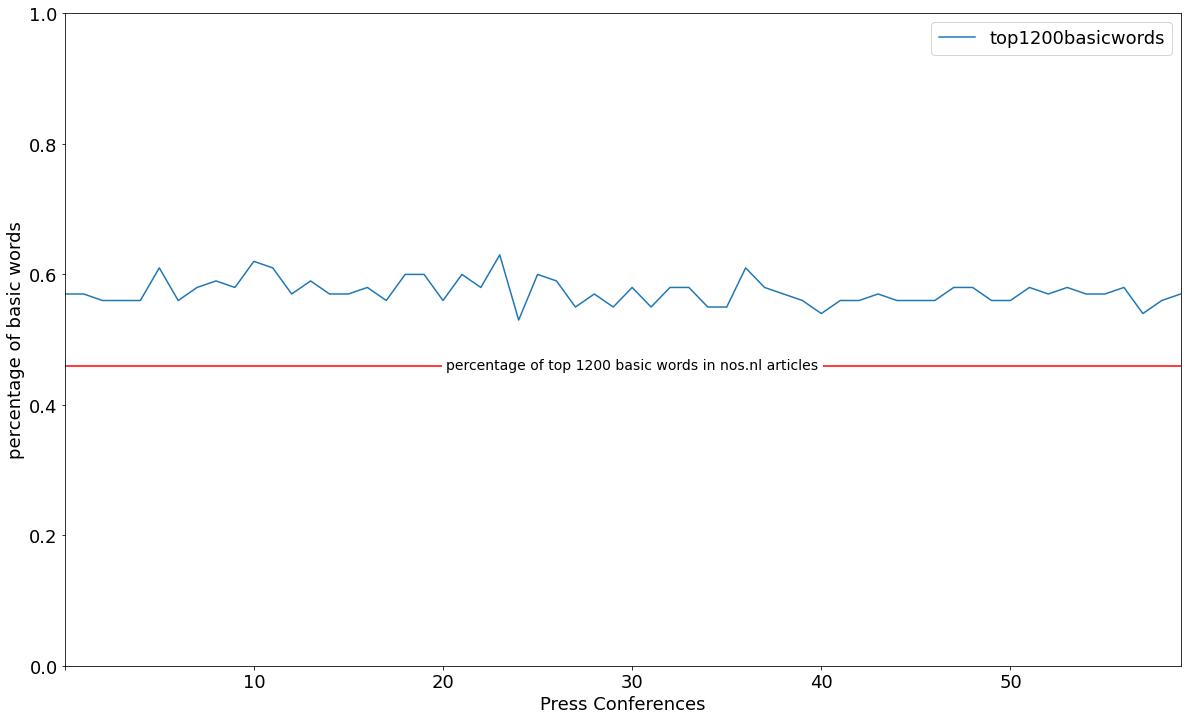

In [64]:
from matplotlib import pyplot as plt
plt.figure()
plt.rcParams.update({'font.size': 18}) # must set in top
df1 = pd.DataFrame(data=l[1:], columns=l[0])
# df2 = pd.DataFrame(data=l[1:], columns=l[0])
#df3 = pd.DataFrame(data=l[1:], columns=l[0])
#lines = df2.plot.line()
customdata = df1
a = customdata.plot.line(figsize=(20,12))
# a = customdata.plot.bar(figsize=(6,9))
a.set_ylim(0, 1)
a.set_xlim(0, 59)
# a.set_xlabel('Press Conferences')
a.set_ylabel('percentage of basic words')
a.set_xlabel("Press Conferences") # dataset of 'nos.nl' Articles
a.xaxis.get_major_ticks()[0].label1.set_visible(False)
a.axhline(y=df3['basicwords1200'][0], xmin=0, xmax=60, color='red')
a.text(30, 0.46, 'percentage of top 1200 basic words in nos.nl articles', fontsize=14, va='center', ha='center', backgroundcolor='w')

In [20]:
urls = pd.Series(urls)
urls = urls[urls.str.contains('/artikel/')]

In [23]:
urls.iloc[27]

'/artikel/2332717-politiemol-mark-m-krijgt-ook-in-hoger-beroep-vijf-jaar-cel'

In [26]:
from datetime import datetime

datelist = pd.date_range('01/04/2020', periods=100).tolist()

In [30]:
datetime.today().strftime('%d-%m-%Y')

'26-01-2022'

In [113]:
import pandas as pd
from bs4 import BeautifulSoup
import pathlib
import requests
from tqdm.notebook import tqdm
import os

pd.set_option('display.max_rows', None)

In [135]:
# https://nos.nl/nieuws/archief/2020-05-25

ARTICLE_OUTPUT_FOLDER = '../input/articles'
NOS_ARCHIVE_URL = 'https://nos.nl/nieuws/archief/'
NOS_URL = 'https://nos.nl'

In [68]:
dates = [x.strftime('%Y-%m-%d') for x in pd.date_range(start = '2020-04-01',end='2020-04-30', freq='D')] # datetime.today()
dates

['2020-04-01',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-05',
 '2020-04-06',
 '2020-04-07',
 '2020-04-08',
 '2020-04-09',
 '2020-04-10',
 '2020-04-11',
 '2020-04-12',
 '2020-04-13',
 '2020-04-14',
 '2020-04-15',
 '2020-04-16',
 '2020-04-17',
 '2020-04-18',
 '2020-04-19',
 '2020-04-20',
 '2020-04-21',
 '2020-04-22',
 '2020-04-23',
 '2020-04-24',
 '2020-04-25',
 '2020-04-26',
 '2020-04-27',
 '2020-04-28',
 '2020-04-29',
 '2020-04-30']

In [ ]:
def get_article_urls(dates):
    article_urls_dict = {}
    
    for date in tqdm(dates, total=len(dates)):
        urls = []
        response = requests.get(NOS_ARCHIVE_URL+date)
        soup = BeautifulSoup(response.content, "html.parser")
        
        for page_content in soup.findAll('a', href=True):
                urls.append(page_content['href'])
        urls = pd.Series(urls)
        urls = urls[urls.str.contains('/artikel/')]
        urls = NOS_URL + urls
        article_urls_dict[date] = list(urls)
        
    return(article_urls_dict)

article_urls = get_article_urls(dates)

In [144]:
def get_article_text(article_url, date):
    file_name = f"{ARTICLE_OUTPUT_FOLDER}/{date}/{article_url[article_url.find('/artikel/')+9:]}"
    
    if not os.path.exists(file_name):
        response_text = requests.get(article_url)
        soup = BeautifulSoup(response_text.content, "html.parser")
        raw_paragraphs = soup.find_all('p', class_="text_3v_J6Y0G")
        texts = [p.get_text() for p in raw_paragraphs]

        with open(file_name, "w", encoding='utf-8') as txt_file:
            txt_file.write('\n'.join(texts))

pathlib.Path(ARTICLE_OUTPUT_FOLDER).mkdir(parents=True, exist_ok=True)

i = 0
for date in tqdm(article_urls, total=len(article_urls)):
    pathlib.Path(ARTICLE_OUTPUT_FOLDER + '/' + date).mkdir(parents=True, exist_ok=True)
    for article_url in tqdm(article_urls[date]):
        get_article_text(article_url, date)
    i += 1
    if i == 1000:
        break

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

In [147]:
file_count = sum(len(files) for _, _, files in os.walk('../input/articles/'))
print(file_count)

1029
